In [273]:
import pandas as pd
#raw = pd.pandas.read_csv('20170101_raw.csv',sep=";")
raw = pd.pandas.read_csv('20180608_raw_geo.csv',sep=",",low_memory=False)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
print("imported " + str(len(raw)) + " rows")
#raw.columns.tolist()

imported 60503 rows


In [292]:
## var cleaning
input = ['living_area','rooms','floor','distance_ocean','rent','construction_year']
clean = raw
clean = clean[pd.notnull(raw[input]).all(axis=1)] #rowsum booleans for nullvals in col
#clean = raw[pd.notnull(raw['living_area']) & pd.notnull(raw['rooms']) & pd.notnull(raw['floor']) & pd.notnull(raw['sold_price']) & pd.notnull(raw['min_distance_to_metro'])]
print("Removed " +str(len(raw)-len(clean)) + " rows with nulls")

Removed 15681 rows with nulls


In [293]:
# additional features
sqm_price =  pd.DataFrame({'sqm_price':clean.sold_price / clean.living_area}) 
sqm_rent =  pd.DataFrame({'sqm_rent':clean.rent / clean.living_area}) 
clean = pd.concat([clean , sqm_price, sqm_rent], axis=1)

In [294]:
# remove outliers
num = len(clean)
before = num
important_vars = ['living_area','rooms','floor','sqm_price','distance_ocean','sqm_rent','construction_year']
for i in important_vars:
    q_u = clean[i].quantile(0.999)
    q_l = clean[i].quantile(0.005)
    clean = clean[clean[i] < q_u]
    clean = clean[clean[i] > q_l]
    print(str(q_l) + " < " + i + " < " + str(q_u) + ". " + str(num - len(clean)) + " removed.")
    num = len(clean)
print("bedore: " + str(before) + ", after: " + str(len(clean)))

19.5 < living_area < 222.0. 281 removed.
1.0 < rooms < 6.0. 7096 removed.
0.0 < floor < 18.556000000004133. 1267 removed.
30067.548746518107 < sqm_price < 142292.56410256444. 218 removed.
196.0 < distance_ocean < 7888.369000000042. 217 removed.
12.09865073529412 < sqm_rent < 89.86111111111111. 216 removed.
1879.0 < construction_year < 2017.0. 500 removed.
bedore: 44822, after: 35027


## Variable Plot

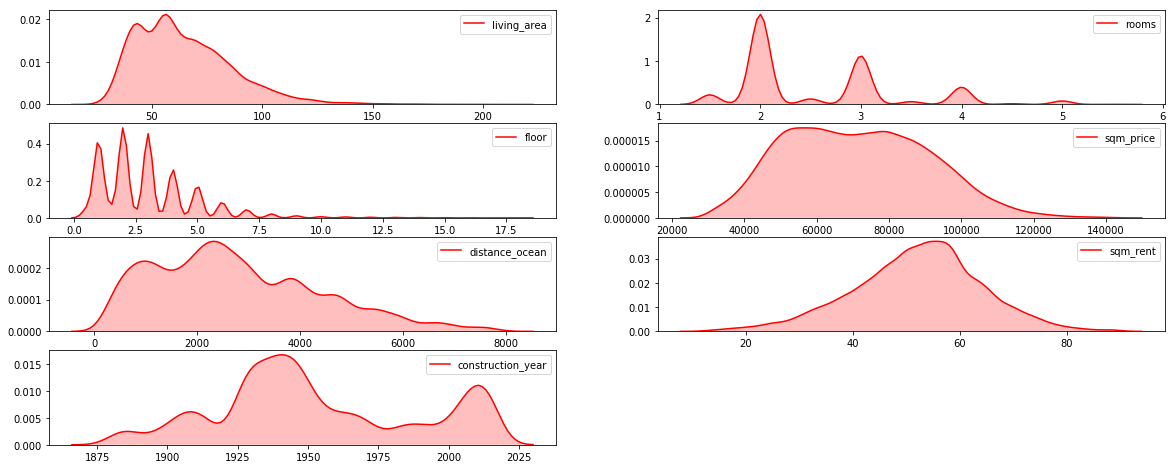

In [295]:
plot_vars = important_vars# ['living_area','rooms','floor','sqm_price','sqm_rent','distance_ocean','min_distance_to_metro']

plt.subplots(figsize=(20,8))
for i in range(1,len(plot_vars)+1):
    plt.subplot(math.ceil(len(plot_vars)/2),2,i)
    sns.kdeplot(clean[plot_vars[i-1]],shade=True, color="r", bw='scott')#bw=math.sqrt(len(clean[plot_vars[i-1]].unique()))/10)

plt.show()

## Bivariate Plot

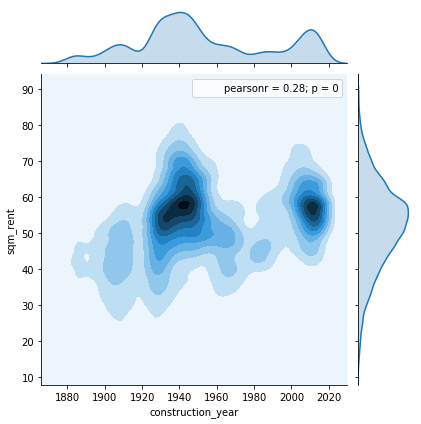

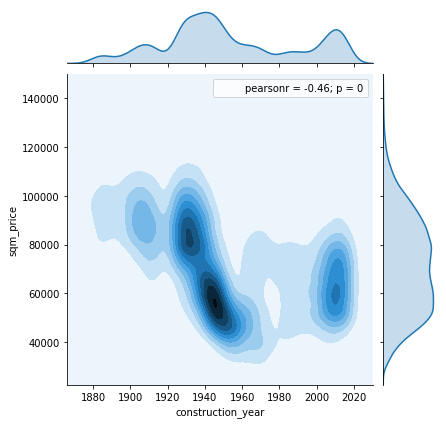

In [306]:
sns.jointplot(x="construction_year", y="sqm_rent", data=clean, kind="kde");
sns.jointplot(x="construction_year", y="sqm_price", data=clean, kind="kde");
#sns.jointplot(x="sqm_rent", y="sqm_price", data=clean, kind="kde");
#sns.jointplot(x="min_distance_to_metro", y="sqm_price", data=clean, kind="kde");
plt.show()